# Formula 1 Machine Learning Study

### Dataset used: [*F1 Dataset (1950-2023)*](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)

### Importing necessary libraries

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

*Loading datasets*

In [368]:
circuits= pd.read_csv("data/circuits.csv")
constructor_results=pd.read_csv("data/constructor_results.csv")
constructor_standings=pd.read_csv("data/constructor_standings.csv")
constructors= pd.read_csv("data/constructors.csv")
driver_standings=pd.read_csv("data/driver_standings.csv")
drivers=pd.read_csv("data/drivers.csv")
lap_times=pd.read_csv("data/lap_times.csv")
pit_stops=pd.read_csv("data/pit_stops.csv")
qualifying=pd.read_csv("data/qualifying.csv")
races=pd.read_csv("data/races.csv")
results=pd.read_csv("data/results.csv")
seasons=pd.read_csv("data/seasons.csv")
sprint_results=pd.read_csv("data/sprint_results.csv")
status=pd.read_csv("data/status.csv")

*Data Cleaning*

In [369]:
results.drop(results[results['number']=='\\N'].index,axis=0)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


*Data Formatting*

In [370]:
formatted_results=pd.merge(results,status[['status','statusId']],on='statusId',how='left')
formatted_results=pd.merge(formatted_results,drivers[['code','driverId']],on='driverId',how='left')
formatted_results=pd.merge(formatted_results,constructors[['name','constructorId']],on='constructorId',how='left')
formatted_results=pd.merge(formatted_results,races[['year','round','name','date','raceId']],on='raceId',how='left')

formatted_results=formatted_results.rename(columns={'code':'driver','name_x':'constructor','name_y':'circuit'})

formatted_results=formatted_results.drop(columns=['statusId','driverId','constructorId','raceId'],axis=1)
formatted_results

,resultId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,...,rank,fastestLapTime,fastestLapSpeed,status,driver,constructor,year,round,circuit,date
0,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,...,2,1:27.452,218.300,Finished,HAM,McLaren,2008,1,Australian Grand Prix,2008-03-16
1,2,3,5,2,2,2,8.0,58,+5.478,5696094,...,3,1:27.739,217.586,Finished,HEI,BMW Sauber,2008,1,Australian Grand Prix,2008-03-16
2,3,7,7,3,3,3,6.0,58,+8.163,5698779,...,5,1:28.090,216.719,Finished,ROS,Williams,2008,1,Australian Grand Prix,2008-03-16
3,4,5,11,4,4,4,5.0,58,+17.181,5707797,...,7,1:28.603,215.464,Finished,ALO,Renault,2008,1,Australian Grand Prix,2008-03-16
4,5,23,3,5,5,5,4.0,58,+18.014,5708630,...,1,1:27.418,218.385,Finished,KOV,McLaren,2008,1,Australian Grand Prix,2008-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,3,19,16,16,16,0.0,44,+1:43.071,5053521,...,15,1:50.994,227.169,Finished,RIC,AlphaTauri,2023,12,Belgian Grand Prix,2023-07-30
26076,26082,2,18,17,17,17,0.0,44,+1:44.476,5054926,...,9,1:50.486,228.213,Finished,SAR,Williams,2023,12,Belgian Grand Prix,2023-07-30
26077,26083,27,0,18,18,18,0.0,44,+1:50.450,5060900,...,4,1:49.907,229.415,Finished,HUL,Haas F1 Team,2023,12,Belgian Grand Prix,2023-07-30
26078,26084,55,4,\N,R,19,0.0,23,\N,\N,...,19,1:53.138,222.864,Collision damage,SAI,Ferrari,2023,12,Belgian Grand Prix,2023-07-30


In [371]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select relevant columns for the model
data = formatted_results[['grid', 'positionOrder']].dropna()

data=data.drop(data[data['positionOrder']=='\\N'].index,axis=0)

data



,grid,positionOrder
0,1,1
1,5,2
2,7,3
3,11,4
4,3,5
...,...,...
26075,19,16
26076,18,17
26077,0,18
26078,4,19


Mean Squared Error: 58.50552070255257


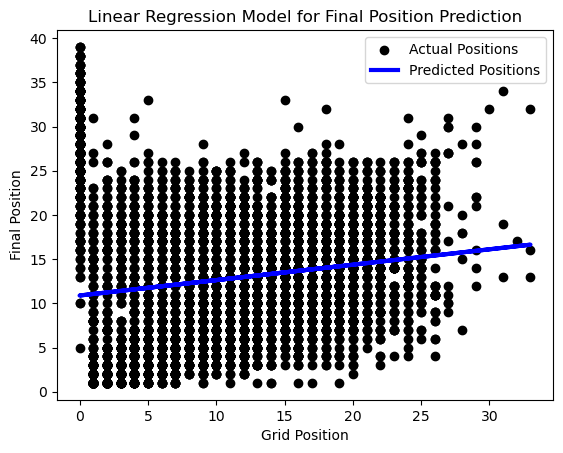

In [372]:

# Split the data into features (X) and target variable (y)
X = data[['grid']]
y = data['positionOrder']

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


# Prepare features (X) and target variable (y)
X_train = train_data[['grid']]
y_train = train_data['positionOrder']

X_test = test_data[['grid']]
y_test = test_data['positionOrder']


# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize the model's predictions
plt.scatter(X_test, y_test, color='black', label='Actual Positions')
plt.plot(X_test, predictions, color='blue', linewidth=3, label='Predicted Positions')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.legend()
plt.title('Linear Regression Model for Final Position Prediction')
plt.show()

In [373]:
data=data.where(data['grid']==0).dropna()
data.where(data['positionOrder']>30).dropna()

,grid,positionOrder
6114,0.0,31.0
6115,0.0,32.0
6146,0.0,31.0
6147,0.0,32.0
6178,0.0,31.0
...,...,...
19845,0.0,31.0
19846,0.0,32.0
19847,0.0,33.0
19848,0.0,34.0


In [374]:

#results.sort_values(by=['year'])
results.head(n=20)

# Merge the datasets based on the 'driverId' column
merged_results = pd.merge(results, drivers[['driverId', 'code']], on='driverId', how='left')

# Replace the 'driverId' column in the 'results' dataset with the 'code' column
merged_results = merged_results.rename(columns={'code': 'driverCode'})

# Now, if you want to drop the original 'driverId' column, you can do:
merged_results = merged_results.drop(columns=['driverId'])

# Display the updated DataFrame
merged_results



,resultId,raceId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverCode
0,1,18,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,HAM
1,2,18,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,HEI
2,3,18,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,ROS
3,4,18,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,ALO
4,5,18,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,KOV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1,RIC
26076,26082,1110,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1,SAR
26077,26083,1110,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1,HUL
26078,26084,1110,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130,SAI


   driverCode  points
31        HAM  4540.5
85        VET  3098.0
84        VER  2326.5
3         ALO  2203.0
64        RAI  1873.0


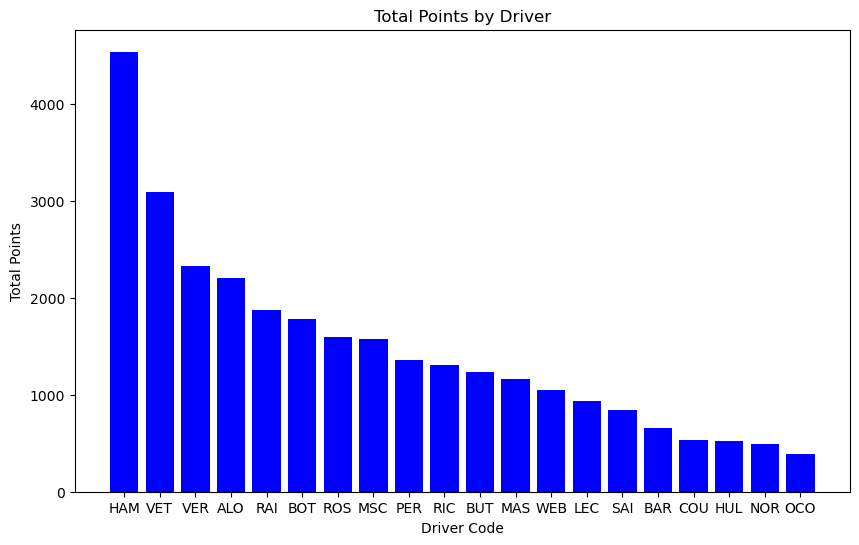

In [375]:
all_time_points_leaderboard=merged_results.groupby("driverCode")["points"].sum().reset_index()

all_time_points_leaderboard=all_time_points_leaderboard[all_time_points_leaderboard['driverCode']!="\\N"]
all_time_points_leaderboard=all_time_points_leaderboard.sort_values(by='points',ascending=False)[0:20]
print(all_time_points_leaderboard.head())
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(all_time_points_leaderboard['driverCode'], all_time_points_leaderboard['points'], color='blue')
plt.xlabel('Driver Code')
plt.ylabel('Total Points')
plt.title('Total Points by Driver')
plt.show()



*Converting everyone's points to new points system*

In [376]:
# Define the points system for the latest year (2019-present)
points_system = {1: 25, 2: 18, 3: 15, 4: 12, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2, 10: 1}

# Additional points for fastest lap
merged_results['points'] = merged_results['positionOrder'].map(points_system)
merged_results.loc[merged_results['fastestLap'] == 1, 'points'] += 1

# Extra points for fastest lap by driver and constructor (if outside the top 10)
merged_results.loc[(merged_results['rank'] == 1) & (merged_results['positionOrder'] > 10), 'points'] += 1


   driverCode  points
31        HAM  4879.0
52        MSC  3903.0
85        VET  3287.0
3         ALO  3044.0
64        RAI  2795.0


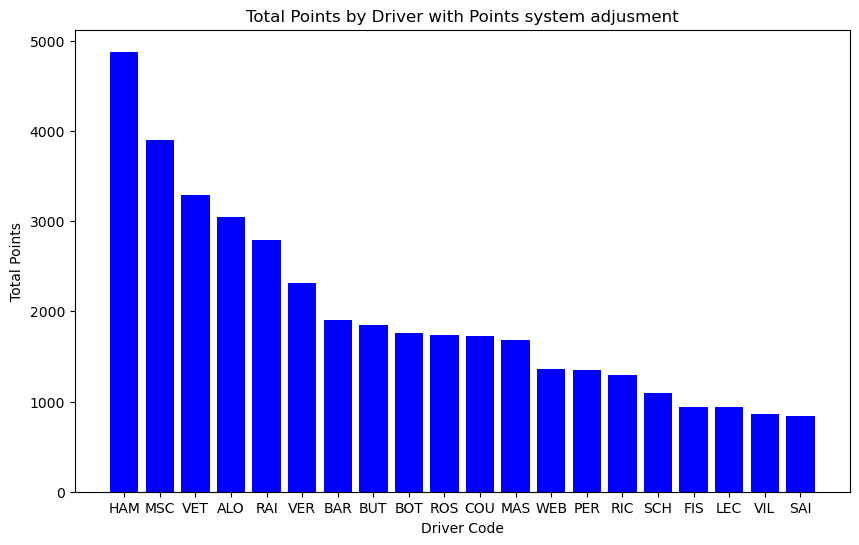

In [377]:
all_time_points_leaderboard=merged_results.groupby("driverCode")["points"].sum().reset_index()

all_time_points_leaderboard=all_time_points_leaderboard[all_time_points_leaderboard['driverCode']!="\\N"]
all_time_points_leaderboard=all_time_points_leaderboard.sort_values(by='points',ascending=False)[0:20] # Show Top 20 for better graph readability
print(all_time_points_leaderboard.head())
# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(all_time_points_leaderboard['driverCode'], all_time_points_leaderboard['points'], color='blue')
plt.xlabel('Driver Code')
plt.ylabel('Total Points')
plt.title('Total Points by Driver with Points system adjusment')
plt.show()

In [378]:
merged_results=merged_results[merged_results['driverCode']!='\\N']
merged_results

,resultId,raceId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverCode
0,1,18,1,22,1,1,1,1,25.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,HAM
1,2,18,2,3,5,2,2,2,18.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,HEI
2,3,18,3,7,7,3,3,3,15.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,ROS
3,4,18,4,5,11,4,4,4,12.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,ALO
4,5,18,1,23,3,5,5,5,10.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,KOV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,213,3,19,16,16,16,NaN,44,+1:43.071,5053521,25,15,1:50.994,227.169,1,RIC
26076,26082,1110,3,2,18,17,17,17,NaN,44,+1:44.476,5054926,37,9,1:50.486,228.213,1,SAR
26077,26083,1110,210,27,0,18,18,18,NaN,44,+1:50.450,5060900,26,4,1:49.907,229.415,1,HUL
26078,26084,1110,6,55,4,\N,R,19,NaN,23,\N,\N,9,19,1:53.138,222.864,130,SAI


In [379]:



# Merge 'results' with 'races' based on 'raceId'
results_with_race_info = pd.merge(merged_results, races[['raceId','circuitId','name']], on='raceId', how='left')

# Merge the above DataFrame with 'circuits' based on 'circuitId'
results_with_race_and_circuit_info = pd.merge(results_with_race_info, circuits[['circuitId','name','location','country']], on='circuitId', how='left')

# Filter data for the specific driver
driver_performance = results_with_race_and_circuit_info[results_with_race_and_circuit_info['positionOrder']==1]

# Count the number of wins at each circuit
wins_by_circuit = driver_performance.groupby(['circuitId', 'name_x', 'location', 'country','driverCode'])['raceId'].count().reset_index()
wins_by_circuit = wins_by_circuit.rename(columns={'raceId': 'wins'})

# Find the circuits with the most wins by driver
circuits_with_most_wins = wins_by_circuit.sort_values(by='wins', ascending=False).head(5)

# Create an interactive bar graph using plotly
fig = px.bar(wins_by_circuit, x='name_x', y='wins', color='driverCode',
             labels={'name_x': 'Circuit Name', 'wins': 'Number of Wins'},
             title='Wins by Driver at Different Circuits',
             hover_name='driverCode', hover_data=['location', 'country'])

# Update layout for better readability
fig.update_layout(barmode='group', xaxis_tickangle=-45)

# Show the interactive graph
fig.show()